In [0]:
import numpy as np
import pandas as pd
import os
import requests
import io


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/blob/master/datasets/heart.csv"
file=requests.get(url).content
hear_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')



In [52]:
heart_data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.891089
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.203480
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000


In [53]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0


In [0]:
X_heart = heart_data.iloc[:,[0,1,2,3,4,5,6,7]]


In [55]:
print(X_heart.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach'], dtype='object')


In [0]:
wcss_heart=[]
for i in range(1,11):
    kmeans_heart = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means_heart = kmeans_heart.fit(X_heart)
    wcss_heart.append(y_means_heart.inertia_)

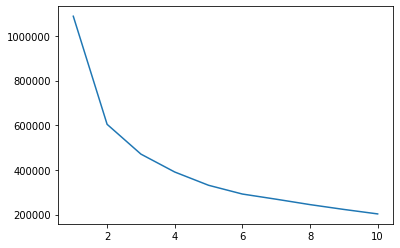

In [57]:
plt.plot(range(1,11), wcss_heart)
plt.show()

In [0]:
kmeans_heart = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
y_kmeans_heart = kmeans_heart.fit_predict(X_heart)

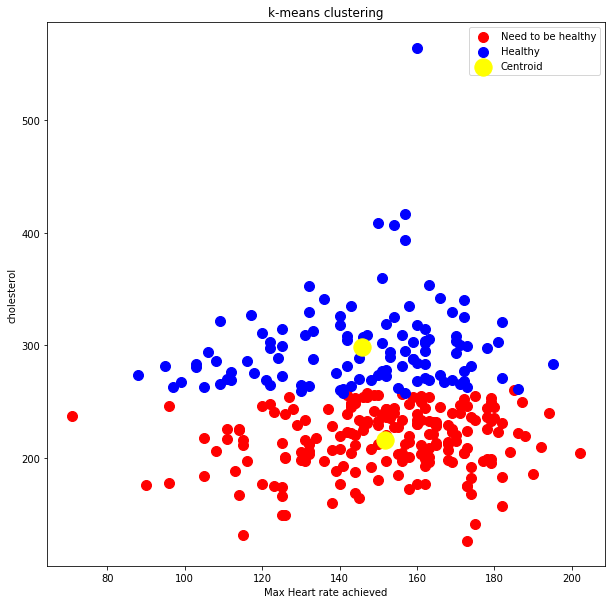

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(X_heart.iloc[y_kmeans_heart == 0,7], X_heart.iloc[y_kmeans_heart == 0,4], s= 100, color = 'red', label ='Need to be healthy')
plt.scatter(X_heart.iloc[y_kmeans_heart ==  1,7], X_heart.iloc[y_kmeans_heart == 1,4], s= 100, color = 'blue', label ='Healthy')

plt.scatter(kmeans_heart.cluster_centers_[:,7], kmeans_heart.cluster_centers_[:, 4], s= 300, color = 'yellow', label ='Centroid')
plt.title('k-means clustering')
plt.xlabel('Max Heart rate achieved')
plt.ylabel('cholesterol')
plt.legend()
plt.show()